# 音の情報処理２：サンプリング周波数とビット深度の設定

音は空気中を伝わる粗密波、すなわち音圧が高い、低いが交互にやってくる振動です。   
この空気の粗密にマイクロフォンの振動板が押し込まれたり吸い寄せられたりして振動すると、   
振動板に取り付けられているコイルも一緒に移動します。   
コイルの中には永久磁石が設置され、磁界が発生しているため、その振動に応じてコイルに電流が発生します。   
よって、マイクロフォンに接続されているケーブルには、＋、-と小刻みに変動する微弱な電流が流れることになります。   
この電流の変動を増幅器により増幅させ、記録したものが音声ファイルとなります。  

ここで、音の振動は連続的（アナログ）ですが、コンピュータでは数字の並びしか記録できないので、   
離散値（デジタル）に変換する必要があります。  
このとき、   
- 1秒間に何回記録するかを**サンプリングレート**（単位はHz)
- 1サンプルあたりを何ビットで記録するかを**ビット深度**（単位はbitまたはbyte)

と呼びます。

収録音の情報を欠損せずに、かつノイズを可能な限り含まないよう記録するためには、
このサンプリングレートやビット深度をきちんと設定してあげる必要があります。

それでは、サンプリングレート、ビット深度の順に、それぞれ集録音に対してどのような役割があるかを見て見ましょう。


## 1. サンプリングレートの影響

### 1.1 サンプリング周波数と集録音の周波数の関係
サンプリング周波数が高い、すなわち1秒間あたりにデータを記録する回数が多ければ多いほど、記録するデータのサイズは大きくなります。  
一方で、その分細かい波まで精密で記録できるであろうことは直感的に理解できますね。  
波が細かいとは、周波数が高い、つまり高音であることを意味します。   
それでは、サンプリング周波数がいくつだと、いくつの周波数の音まで記録できるのでしょうか？  

これを調べるため、周波数が5Hzで1秒間の純音（つまりサイン波が5つ分）の音が鳴っていると想定して、これを様々なサンプリングレートで収録した場合の波形を見て見ましょう。
サンプリングレートを90, 80, 70,..と下げていくと何が起こりますか？  

<IPython.core.display.Javascript object>


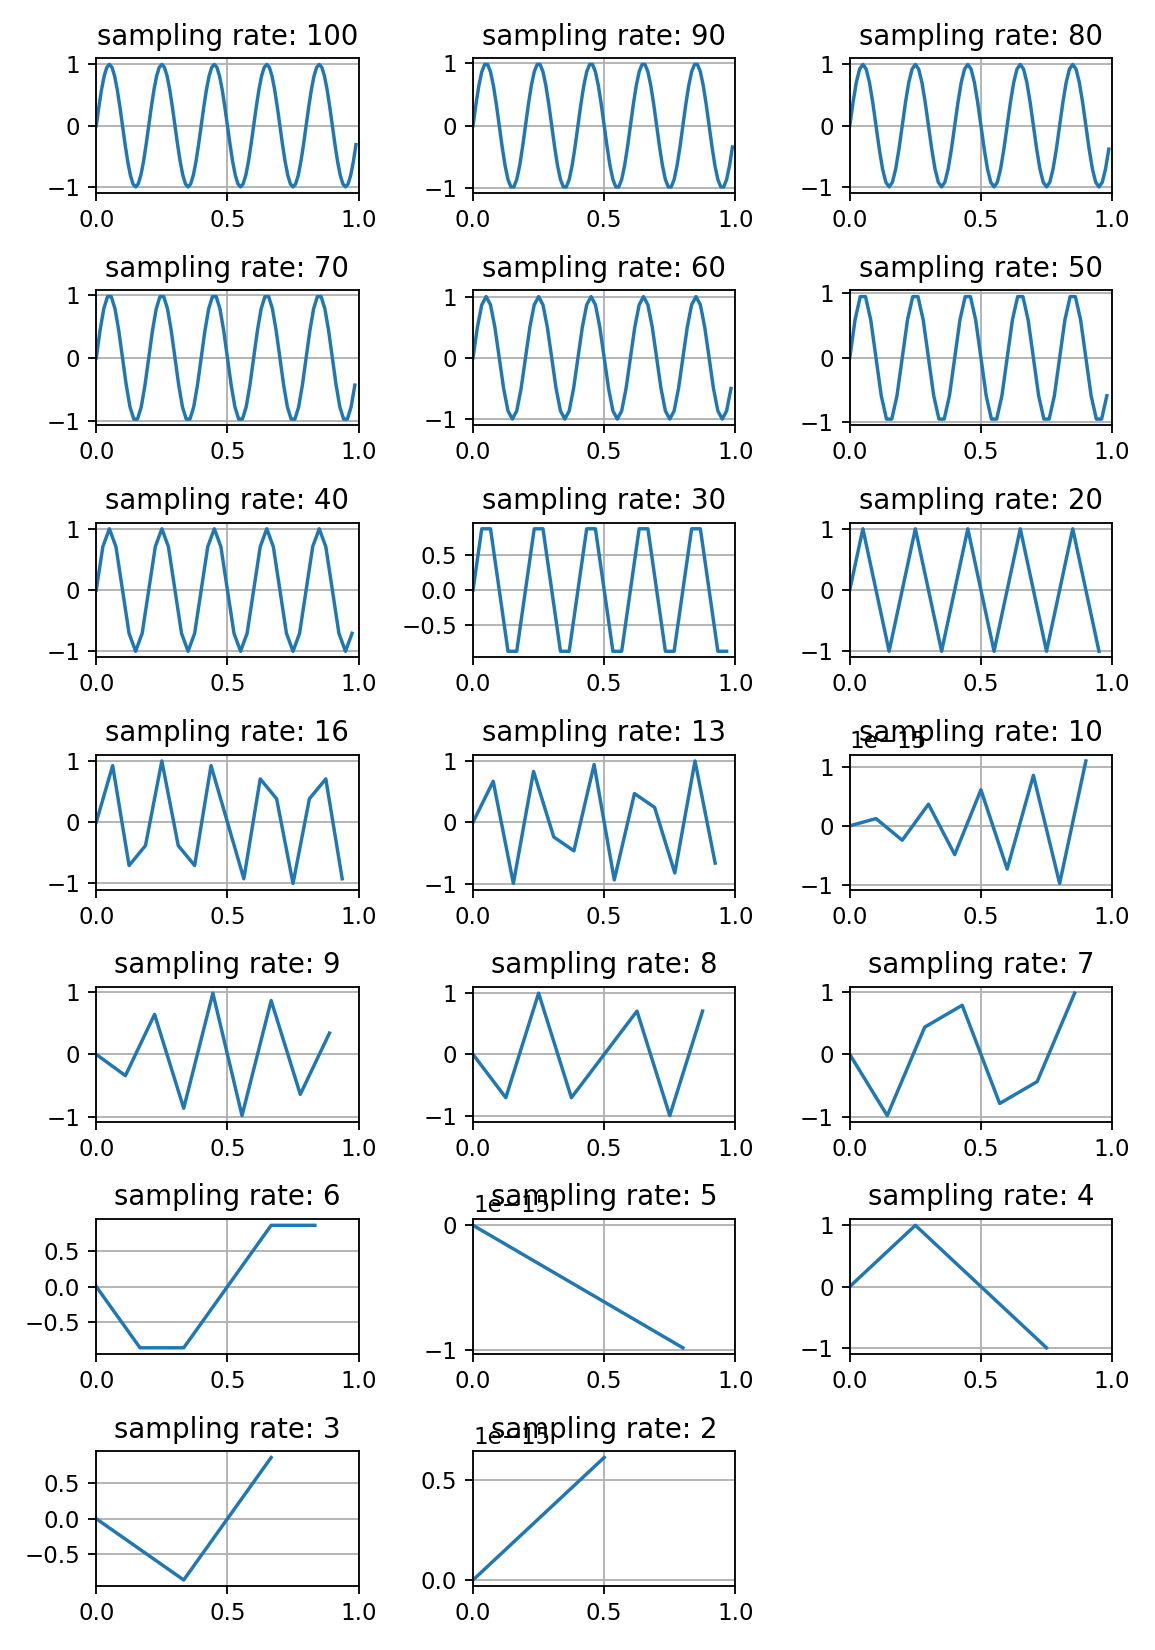

In [1]:
%matplotlib notebook
import math
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7, 10)) # figure(図を配置する画面)のサイズを指定

WaveFreq = 5 # 原音は5Hzの音
num = 1
# サンプリングレートをだんだん下げていこう
for sampling_rate in [100, 90, 80, 70, 60, 50, 40, 30, 20, 16, 13, 10, 9, 8, 7, 6, 5, 4, 3, 2]:
    ax = plt.subplot(7, 3, num) # figureには複数の図を配置できるので、そのうち図を1つ描画する空間を準備
    rad = [i*WaveFreq*(2*math.pi)/sampling_rate for i in range(sampling_rate)] 
    data = [math.sin(i) for i in rad]# 角度がradだったときの振幅を計算
    x = np.arange(0, len(data)/sampling_rate, 1.0/sampling_rate)
    ax.plot(x, data)# グラフを描画
    ax.set_xlim(0, 1.0)
    ax.grid()
    plt.title('sampling rate: ' + str(sampling_rate)) 
    num += 1
    
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/SoundProcessing2-1.png') # 図を画像として保存

原音は5Hzで1秒間のサイン波ですから、それぞれのグラフには山が5つずつないとおかしいのですが、10Hzを下回ったころからだんだん山の数が減っていきますね。   
どうやら、ある周波数の音を収録するには、その2倍よりも高いサンプリングレートで収録しないと、元の波形が保てないようです…。

### 1.2 エイリアシングノイズ

収録音のもつ周波数に対してサンプリングレートが低いと起きる問題をもう一つ紹介しておきましょう。

実は音の周波数とサンプリングレートの間には、エイリアシングと呼ばれる現象があります。   
これは、音の高さ（つまり周波数）が全く違う二つの音が、デジタル波形上は全く同じ形にみえてしまうという現象です。
実験してみましょう。  

同じサンプリング周波数(50Hz)で、周波数が5Hzのサイン波と、周波数が45(これはサンプリング周波数 － サイン波の周波数）Hzのサイン波を描画して比べてみてください。  
2つのグラフは違うはずですが、どうですか？  
周波数をいろいろと替えて実験してみましょう。

<IPython.core.display.Javascript object>


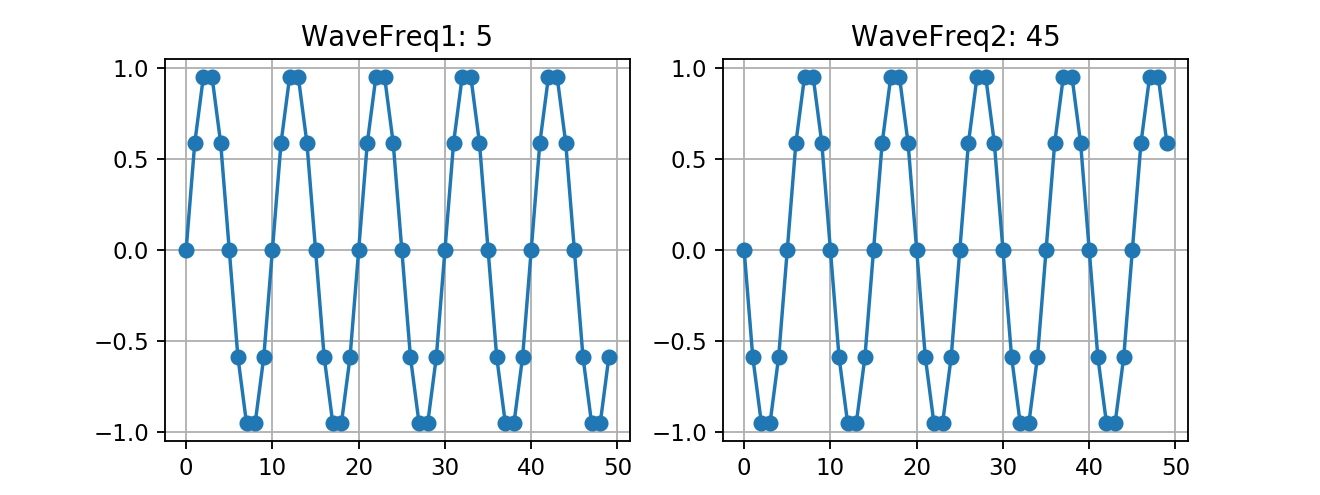

In [5]:
sampling_rate = 50 # sampling_rateは50Hzとします
WaveFreq1 = 5 # <-- ここをいろいろと替えて実験してみよう
WaveFreq2 = sampling_rate - WaveFreq1 # 下のグラフの右側のサイン波の周波数はサンプリング周波数に対するWaveFreq1の補数

rad1 = [i*WaveFreq1*(2*math.pi)/sampling_rate for i in range(sampling_rate)]
y1 = [math.sin(i) for i in rad1]
rad2 = [i*WaveFreq2*(2*math.pi)/sampling_rate for i in range(sampling_rate)]
y2 = [math.sin(i) for i in rad2]

fig = plt.figure(figsize=(8, 3)) # figure(図を配置する画面)のサイズを指定
ax0 = plt.subplot(1, 2, 1)
ax0.plot(y1, marker="o")
ax0.grid()
ax0.set_title('WaveFreq1: {}'.format(WaveFreq1))

ax1 = plt.subplot(1,2,2)
ax1.plot(y2, marker="o")
ax1.grid()
ax1.set_title('WaveFreq2: {}'.format(WaveFreq2))
plt.savefig('fig/SoundProcessing2-2.png') # 図を画像として保存

二つの波は違う周波数のはずなのに同じ形に見えますね。なぜでしょうか？  

**右の高周波の波のグラフが左の低周波の波のグラフと同じにみえるのは、高周波の波の周波数に対してサンプリング周波数が低すぎるためです。**

それでは、右の高周波の波を、十分高いサンプリングレートで収録したらどうなるでしょうか？   
45Hzの純音（サイン波）を、   
- サンプリングレートが50Hzで記録したものと、
- サンプリングレートが500Hz（つまり十分高いサンプリングレート）   
で記録した波形を重ねて見ましょう。

サンプリングレートが十分高いものは、確かに45個の山を描画できています。  
しかしサンプリングレートが低いほうでは、山は5個しかありません。    
グラフを拡大し、なぜ5Hzのサイン波と45Hzのサイン波が50Hzでサンプリングすると同じグラフになるか考えてみましょう。わかりましたか？  

<IPython.core.display.Javascript object>


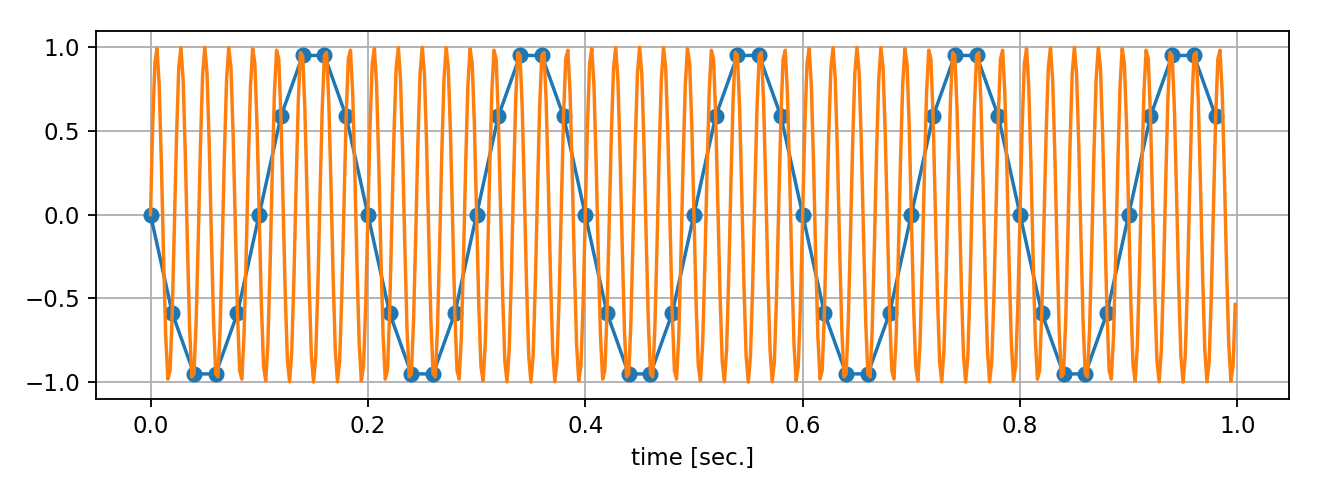

In [6]:
WaveFreq = 45 # 原音の周波数
Low_sampling_rate = 50 # 低いサンプリングレート
High_sampling_rate = 500 # 十分高いサンプリングレート

# 低いサンプリングレートでサンプリング
rad1 = [i*WaveFreq*(2*math.pi)/Low_sampling_rate for i in range(Low_sampling_rate)]
y1 = [math.sin(i) for i in rad1]
x1 = np.arange(0, len(y1)/Low_sampling_rate, 1.0/Low_sampling_rate)

# 高いサンプリングレートでサンプリング
rad2 = [i*WaveFreq*(2*math.pi)/High_sampling_rate for i in range(High_sampling_rate)]
y2 = [math.sin(i) for i in rad2]
x2 = np.arange(0, len(y2)/High_sampling_rate, 1.0/High_sampling_rate)

# 波形を描画
fig = plt.figure(figsize=(8, 3)) # figure(図を配置する画面)のサイズを指定
ax = plt.subplot() # 描画
ax.plot(x1, y1, marker="o") # 低サンプリングレートを描画
ax.plot(x2, y2) # 高サンプリングレートを描画
ax.set_xlabel('time [sec.]')
ax.grid() # グリッド線を描画
fig.tight_layout() # 図がはみ出さないようにレイアウト
# ax.set_xlim(0.5,0.8) # <---- 拡大したいときはこのコメントを外してください。下のグラフを直接ズームすることもできます。
plt.savefig('fig/SoundProcessing2-3.png') # 図を画像として保存

サンプリングレートが十分高いものは、確かに45個の山を描画できています。  
しかし50Hzのサンプリングレートで45Hzのサイン波を収録すると、5個しかありません。   
**45Hzのサイン波を1秒間に50回等間隔でサンプリングすると、各サンプル時の振幅値が、なんと5Hzのときと全く同じになるのです！**

これはすなわち、45Hzの音が5Hzの音として収録されることを意味します。  
当然これは正しい波形じゃないので、**雑音**ですよね。  
このような雑音を**エイリアシングノイズ**あるいは**折り返し雑音**と呼びます。

エイリアシングは動画でも発生します。  

テレビで車や馬車などの車輪が回っている様子を撮影すると、まるで車輪がゆっくりと逆回転するように見えることがあります。  
これは、車輪が逆方向に回っているのとほとんど同じタイミングに画像を撮影しまったために起きる現象です。  

通常、テレビのサンプリング周波数（映像の場合は1秒あたり何フレームかで定義するのでフレームレートと呼び、frame per second: fpsという単位を使います）は約30fpsなので、カメラは1/30秒に1枚ずつ写真を撮影します。   
車輪が1秒間にちょうど30回（つまり360度回転するのにかかる時間が1/30s)、回転していたすると、カメラは毎回車輪が同じ位置にいるときに写真を撮影するので、車輪は止まっているように見えます。  
また、もし350度回転するのにかかる時間が1/30sだった場合は、逆方向に10度回転するのにかかる時間が1/30sのような車輪と、撮影された画像は全く同じになります。  

### 1.3 サンプリング定理
上の実験で分かる通り、サンプリング周波数が$F$Hzの場合、$f$Hzの波は$(F-f)$Hzの波と区別することが出来ません。  
サンプリング周波数が$F$Hzのとき、$\dfrac{F}{2}$よりも高い周波数の波$f$を収録してしまうと、
それは$(F-f)$の周波数の波と混ざって記録されてしまいます。これを折り返し雑音（aliasing noise)と呼びます。

逆に言えば、収録対象に含まれている音（通常は様々な周波数の波が混ざった混合音です）の最大周波数が$f_{max}$Hzである場合、
これを記録するためには$F > 2 \times f_{max}$であるようなサンプリング周波数$F$で記録しなければいけません。  
これをサンプリング定理と呼び、サンプリング周波数の1/2の周波数をナイキスト周波数と呼びます。  
ノイズや欠落なく波形を記録したいならば、その波形に含まれるすべての波の成分がナイキスト周波数より低い領域に収まっていなければいけません。

自然界の音や波を収録する場合、人間に聞こえないほど高い周波数であっても、高周波成分が含まれているものです。  
実験に必要な周波数が最大何Hzなのかを考え、その最大周波数が$f_{max}$であるならば、   

(1) $2 \times f_{max}$よりも高いサンプリング周波数で収録すること   
(2) $f_{max}$以上の周波数成分は収録前にアナログフィルタなどで除去すること  

に注意しなければ、情報が欠損したり、ノイズが入ったりするので注意しましょう。

## 2. ビット深度の影響
ビット深度とは、1サンプルあたりを何ビットで記録するかを表す値です。  
1サンプルあたり16bitで記録すると、y軸方向は-32768から32767までの65536段階で現されます。  
1サンプルあたり8bitで記録すると、y軸方向は-128から127までの256段階となり、16bitよりもずっと粗いことがわかります。  


### 2.1 量子化誤差
それでは、同じ音を、ビット深度が16bitと8bitでそれぞれ収録した音声ファイルを描画して比較してみましょう。

<IPython.core.display.Javascript object>


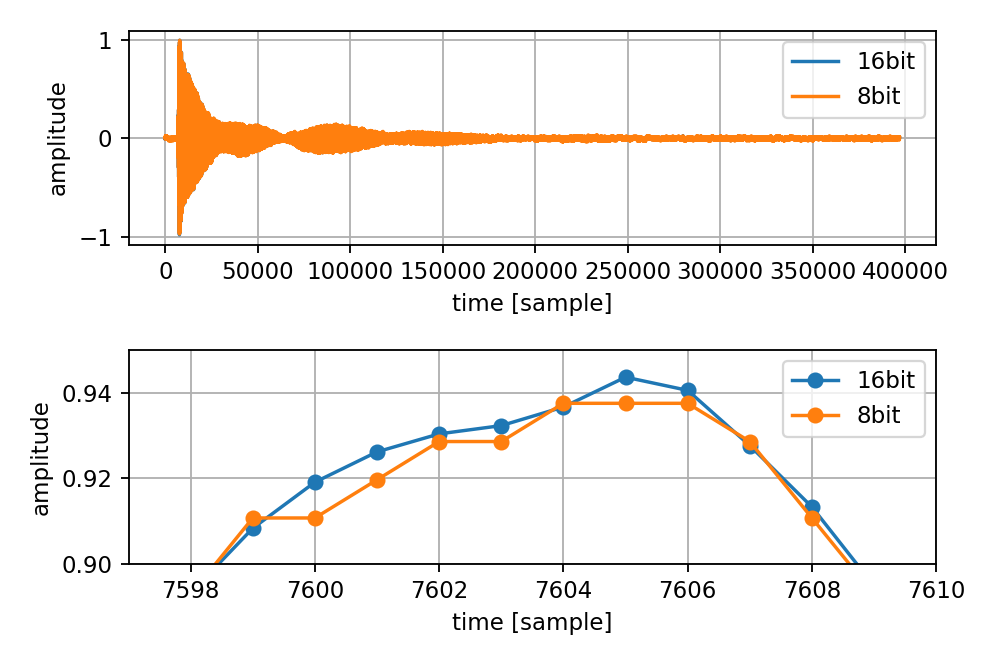

In [21]:
import wave
import numpy as np

wavfile_16bit = wave.open("sounds/Piano-A4-16bit-44100Hz.wav" , "rb" ) # ビット深度16bit
wavfile_8bit = wave.open("sounds/Piano-A4-8bit-44100Hz.wav" , "rb" ) # ビット深度8bit

# ビット深度が16ビットの音声ファイルを読み込み
x_16bit = wavfile_16bit.readframes(wavfile_16bit.getnframes())
x_16bit = [float(i) for i in np.frombuffer(x_16bit, dtype= "int16")] # バイナリデータをint型に変換
x_16bit = x_16bit/np.max(np.abs(x_16bit))
wavfile_16bit.close()

# ビット深度が8ビットの音声ファイルを読み込み
x_8bit = wavfile_8bit.readframes(wavfile_8bit.getnframes())
x_8bit = [float(i) - 128 for i in np.frombuffer(x_8bit, dtype= "uint8")] # バイナリデータをint型に変換
x_8bit = x_8bit/np.max(np.abs(x_8bit))
wavfile_8bit.close()

# 波形を描画
fig = plt.figure(figsize=(6, 4)) # figure(図を配置する画面)のサイズを指定
ax0 = plt.subplot(2,1,1) 
ax1 = plt.subplot(2,1,2) 

ax0.plot(x_16bit) # ビット深度が16-bitの波形
ax0.plot(x_8bit) # ビット深度が8-bitの波形
ax0.legend(['16bit', '8bit'])
ax0.set_xlabel("time [sample]")
ax0.set_ylabel("amplitude")
ax0.grid()

# 同じ波形を拡大
ax1.plot(x_16bit, marker="o") # ビット深度が16-bitの波形
ax1.plot(x_8bit, marker="o") # ビット深度が8-bitの波形
ax1.grid()
ax1.legend(['16bit', '8bit']) # 凡例を描画
ax1.set_xlabel("time [sample]")
ax1.set_ylabel("amplitude")
ax1.set_xlim(7597,7610) # 波形を拡大（X軸方向）
ax1.set_ylim(0.900, 0.950) # 波形を拡大（Y軸方向）
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/SoundProcessing2-4.png') # 図を画像として保存

上のグラフでは、ブルーのグラフ（16-bit)の上にオレンジのグラフ（8-bit)が重なっていています。   
しかし、一部分を拡大した下のグラフでは、ブルーのグラフ（16-bit)に比べてオレンジのグラフ（8-bit)の方が、y軸方向の動きが粗いことがわかるでしょうか？  
16-bitは65536段階（正方向だけ見れば32768段階）、8-bitは256段階（正方向だけ見れば127段階）でしかy軸方向の動きを表現できないためです。

8-bitのほうが16-bitよりも原音との差が大きいです。このような、量子化時に生じる原音との差を**量子化誤差**と呼びます。   
この差はノイズ（雑音）となって音に現れます。   

### 2.2 音量とダイナミックレンジ  
さて、この音は大きいでしょうか？それとも小さいでしょうか？

答えは、大きいとも小さいとも言えない、が正解でしょう。  
なぜなら、収録された波形はマイクロフォンの振動板で受けた空気圧の変動(つまり相対値)を表しているにすぎず、
それが実際の空間でどの程度の音圧であったか、あるいはどの程度の音圧として再生されるかは、
その後の出力系の設定（通常アンプと呼ばれる増幅器で電流をどこまで増幅させるかや、スピーカのインピーダンスがいくつか等）によって変わってくるからです。簡単に言えば、マイクボリュームを上げれば小さな音でも広い振幅として記録され、スピーカのボリュームを上げれば音は大きくなります。  
よって、上のグラフのy軸には単位はありません。    

音の大きさはデシベル(dB SPL)という対数尺度が使われます(SPL: Sound Pressure Level)。  
対数尺度を使っている理由の一つは、「人間の感覚量は刺激量の対数に比例する」というウェーバ・フェヒナーの法則があり、
聴覚もこれに従うと考えたためです。

音響分野では、音圧の２乗が音の強さに比例するため、測定された音圧を$p$、基準となる音圧の実効値を$p_0$とすると、
音圧レベル$L_p$（dB SPL）は次の式で与えられます。   
$$L_p = 10 \times \log_{10} \dfrac{p^2}{{p_0}^2} = 20 \times \log_{10} \dfrac{p}{p_0}$$

$p_0$は、収録音の収録時の音圧がわかっている場合は、人間が聞こえる最小の音と言われている$20 \mu$Pa (Paはパスカルという単位）とします。  

ただし、通常のマイクロフォンば実際の空気中の音圧は測定できない（校正が施された「騒音計」と呼ばれる特殊な音圧計測機ならば可能）ため、$p_0$は1として計算せざるを得ず、
この値は絶対的な音量を表す指標ではなく、相対的な音量でしかありません（よって単位には[dB SPL]ではなく[dB]を使います）。  
微弱な波形でもマイクボリュームを上げれば大きな音になり、   
大きな波でもマイクボリュームを下げれば小さな音になるというわけです。

ではビット深度は音量の何を左右するのでしょうか？   
実は**ダイナミックレンジ（音量の最小値と最大値の比率）が変わる**のです。  

8-bitで表した場合の微弱な波の音と大きな波の音の音量の差は、   
16-bitで表したときよりもずっと小さいということです。   
逆に言えば、16-bitで収録した音楽を再生したときと同じ大きさで8-bitで収録した音楽を再生すると、   
16-bitで収録した時にはほとんど聞こえなかったような微弱な雑音も、一緒に大きくなって無視できない雑音として聞こえてしまうことがあるということです。

8-bitの音と16-bitの音を比べてみましょう。8-bitの音のほうは、サーという雑音が聞こえるのがわかりますか？  
- 16-bit: sounds/Piano-A4-16bit-44100Hz.wav
- 8-bit:  sounds/Piano-A4-8bit-44100Hz.wav

人間の聴覚のダイナミックレンジは120 dBだといわれています。  
8-bitの場合、   
`20×log(256)+1.76（dB）＝49.92（dB）`   
16bitの場合、   
`20×log(65536)+1.76（dB）＝98.09（dB）`   
ですので、8-bitは愚か、16-bitのビット深度でも、無音（といっても微弱な空気圧の変動はある）の音が聞こえてしまう可能性があるということになります。  
ちなみに音響のビット深度の規格としては、この上に24-bitがあり、  
`20×log(16777216)+1.76（dB）＝146.25（dB）`  
ですので、これでようやく人間の聴覚で雑音を感じない音が再生できるわけですが、多くの記録デバイスでは16-bit単位でデータを扱うため、24-bitを収録しようとすると、32-bitを割り当て、最後の8-bitは0で埋めるといったリソースの無駄遣いを強いられることになり、24-bitの音声フォーマットが広まらない原因の一つとなっています。

【気になる人のための補足】  
上のダイナミックレンジの計算で、1.76dBを足している理由は以下の通りです。  
ダイナミックレンジは、信号波と量子化雑音の比です。
後者は三角波であり、正弦波と三角波では実効値の比率が$\sqrt{\dfrac{3}{2}}$となるため、
$$ 20×\log_{10} \left(\sqrt{\dfrac{3}{2}}\right)＝1.76$$
を加えます。

### 2.3 音の収録時におけるマイクボリュームの調整



では、音を収録するときにマイクボリュームはいくつに設定すべきでしょうか？  
1サンプルあたり16-bitで記録すると決めた場合、-32768から32767までの65536段階でしか記録できないことは変わりません。  
ですから、マイクボリュームを小さくして、例えば-100から100の間を行き来するような波形として記録してしまうと、その波は201段階でしか記録できないということになります。これは8-bit（つまり256段階)で記録した場合と大差ないということになってしまいます（つまり情報の欠損が大きくなります）。  
一方でマイクボリュームを上げすぎると、記録可能な最大値である32767を超えるような波形が入力され、その値はすべて32767と記録されてしまうため、波形が記録できません（いわゆる「音割れ」です）。 

理想的には、入力音の振幅の最大値が表現可能な最大値を超えないようにマイクやアンプのボリュームを調整すれば最も効率よく音が収録できるのですが、
音を録音するときなどは、収録中に生じる音量の最大値を予測できないこともありますよね。  
音を収録するときは、  
１）再現可能な実験であれば、事前に一通り収録してみて、音割れが起きないような最大の大きさにマイクボリュームを調整する、  
２）再現できないならば、マイクボリュームを低めに設定する代わりに、ビット深度を大きめに取って分解能を確保する  
などの対策が必要となります。
